In [1]:
import io
import requests
from PIL import Image
from matplotlib import pyplot as plt

from image_search_engine import ImageSearchEngine

# Load images

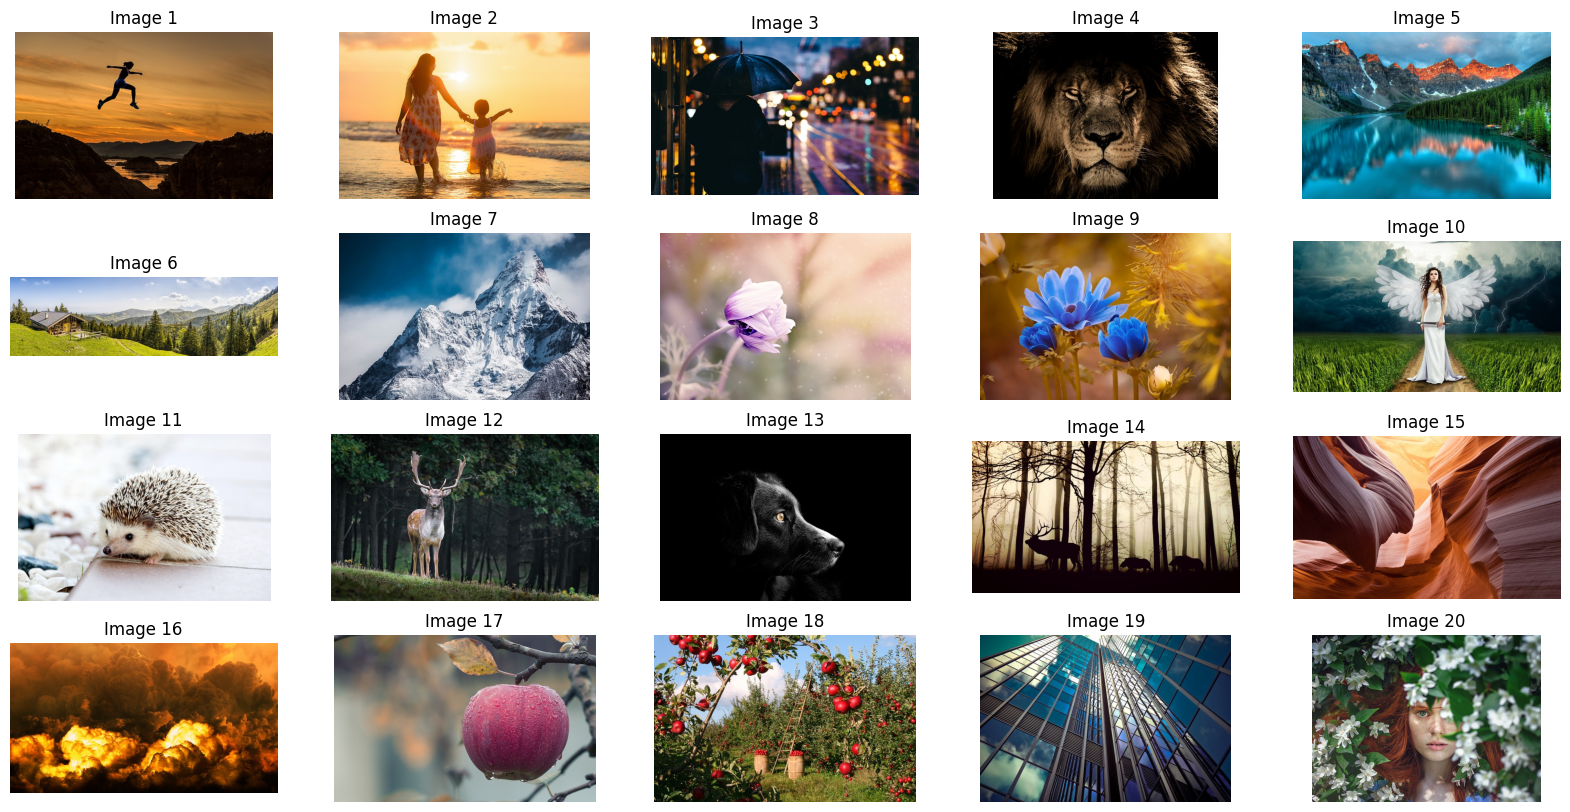

In [2]:
BASE_IMAGE_URL = "https://raw.githubusercontent.com/yavuzceliker/sample-images/main/images"

images = []
for k in range(1, 21):
    response = requests.get(f"{BASE_IMAGE_URL}/image-{k}.jpg")
    image = Image.open(io.BytesIO(response.content))
    images.append(image)

# Display the images
plt.figure(figsize=(20, 10))
for i, image in enumerate(images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {i + 1}")

# ImageSearchEngine retrieval quality test

In [3]:
engine = ImageSearchEngine()

# Add images to the engine
for k in range(1, 21):
    engine.index_image(f"{BASE_IMAGE_URL}/image-{k}.jpg")

assert len(engine.image_hashes) == 20

### Retrieve based on text
- The system is able to retrieve semantically similar images from the engine

Top 5 relevant images for each text query:


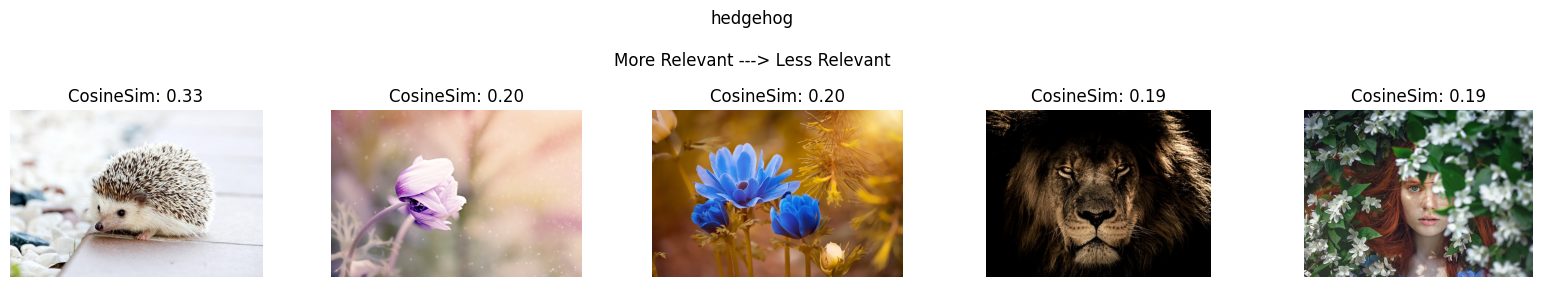

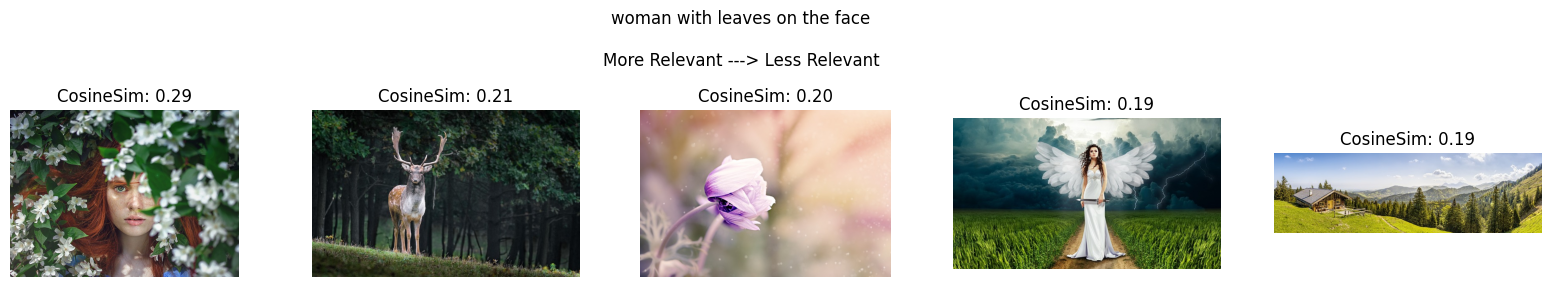

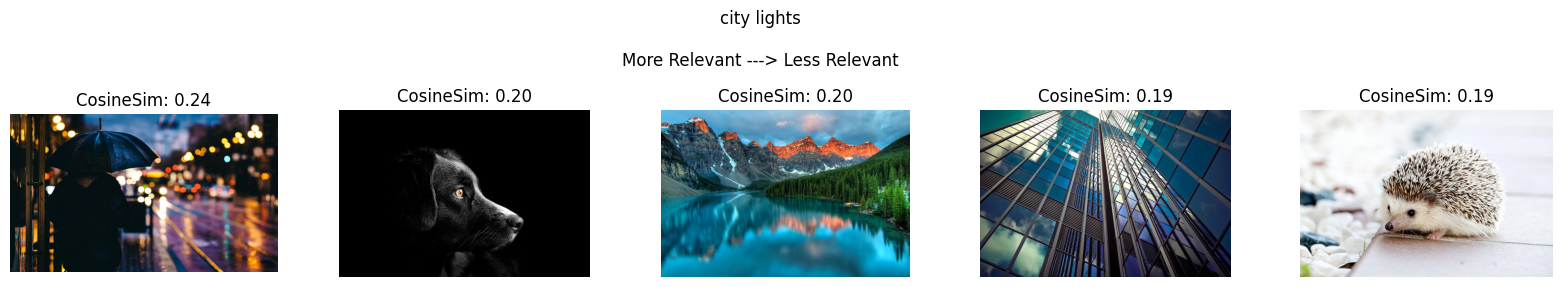

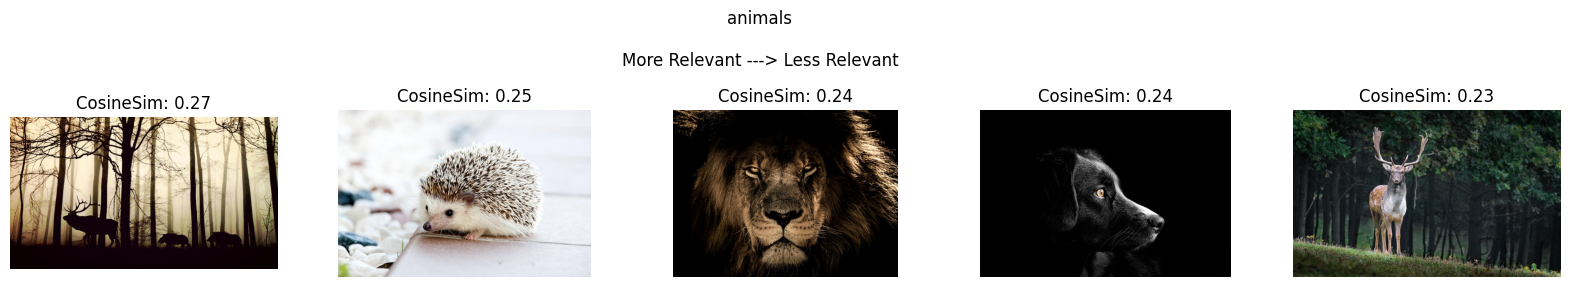

In [4]:
text_queries = ["hedgehog", "woman with leaves on the face", "city lights", "animals"]

print('Top 5 relevant images for each text query:')
for text_query in text_queries:
    relevant_urls, distances = engine.search_text(text_query)

    # show the relevant images
    plt.figure(figsize=(20, 10))
    for i, url in enumerate(relevant_urls):
        response = requests.get(url)
        image = Image.open(io.BytesIO(response.content))
        plt.subplot(4, 5, i + 1)
        plt.imshow(image)
        plt.title(f"CosineSim: {1 - distances[i]:.2f}")
        plt.axis("off")

    plt.suptitle(f"{text_query}\n\nMore Relevant ---> Less Relevant")
    plt.show()

### Retrieval based on images

- The system is able to retrieve semantically similar images from the engine

Top 5 relevant images for each test image:


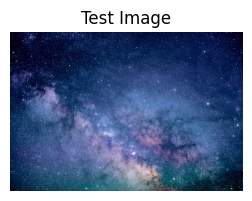

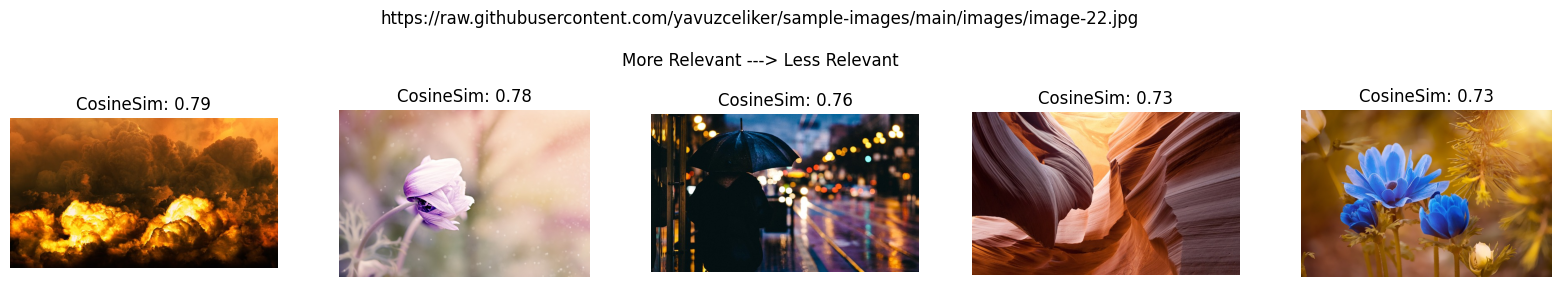

********************


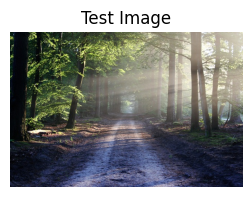

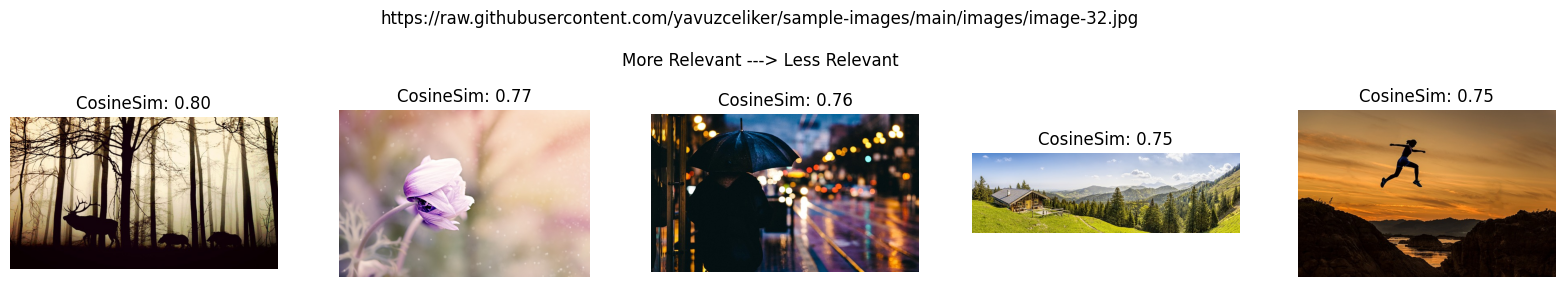

********************


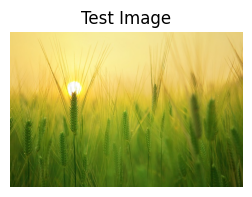

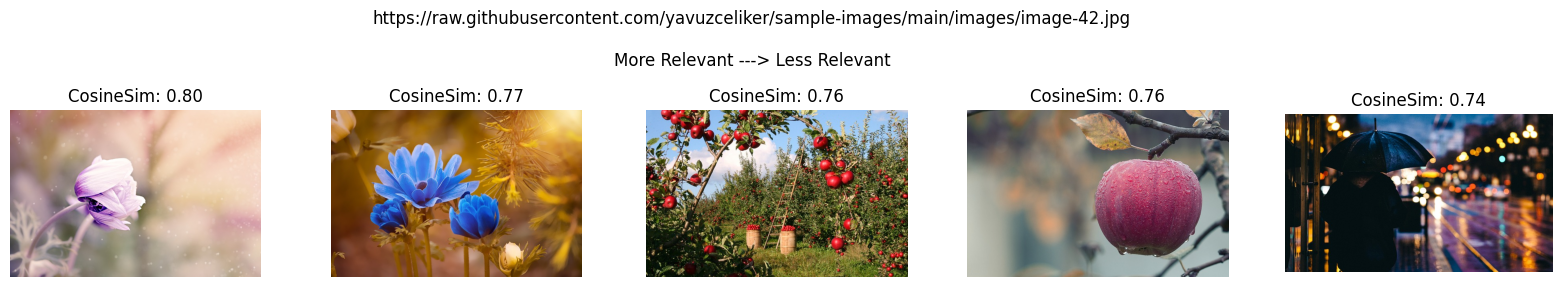

********************


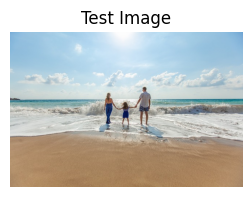

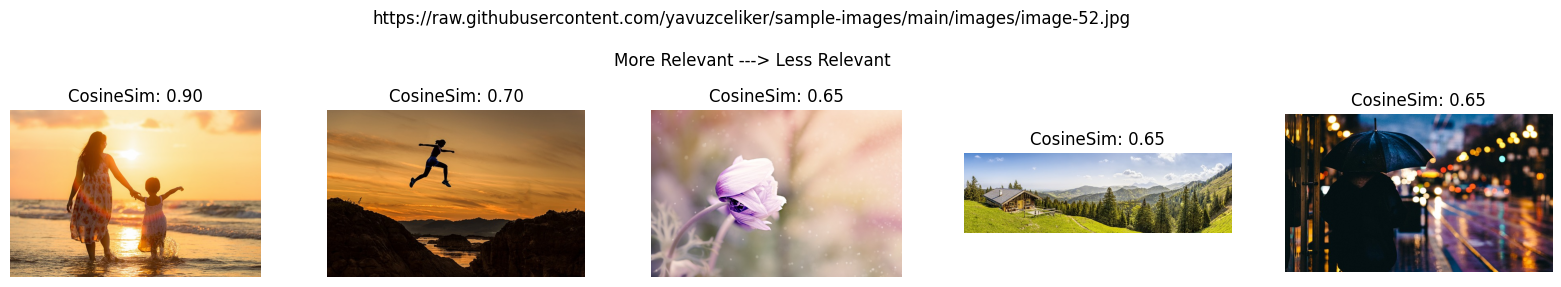

********************


In [5]:
test_image_urls = [f"{BASE_IMAGE_URL}/image-{k}.jpg" for k in range(22, 60, 10)]

print('Top 5 relevant images for each test image:')

for test_image_url in test_image_urls:
    response = requests.get(test_image_url)
    test_image = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(3, 3))
    plt.imshow(test_image)
    plt.axis("off")
    plt.title(f"Test Image")
    plt.show()
    relevant_urls, distances = engine.search_image(test_image_url)

    plt.figure(figsize=(20, 10))
    # show the relevant images
    for i, url in enumerate(relevant_urls):
        response = requests.get(url)
        image = Image.open(io.BytesIO(response.content))
        plt.subplot(4, 5, i + 1)
        plt.imshow(image)
        plt.title(f"CosineSim: {1 - distances[i]:.2f}")
        plt.axis("off")

    plt.suptitle(f"{test_image_url}\n\nMore Relevant ---> Less Relevant")
    plt.show()
    print('*'*20)